# Aprendizado não-supervisionado (Clustering)

### K-Means Clustering

K-means vai servir para trabalhar com grupos específicos, então vai estabelecer o filtro e determinar os grupos e a partir disso determinar a sua ação a ser seguida.

In [1]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('store.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
data.columns = ['IdCliente', 'Gênero', 'Idade', 'Renda Anual', 'Nivel de Gasto (1-100)']

In [7]:
data.head()

,IdCliente,Gênero,Idade,Renda Anual,Nivel de Gasto (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.set_index('IdCliente', inplace=True) # determinando que a coluna é IdCliente é o index

In [9]:
data.head()

,Gênero,Idade,Renda Anual,Nivel de Gasto (1-100)
IdCliente,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [10]:
df = data[['Renda Anual', 'Nivel de Gasto (1-100)']]

In [11]:
df.head()

,Renda Anual,Nivel de Gasto (1-100)
IdCliente,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


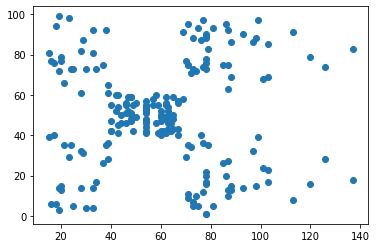

In [14]:
plt.scatter(df['Renda Anual'], df['Nivel de Gasto (1-100)']) # a partir desse gráfico dar para se perceber os clustters

plt.show()

# Identificar quantidade de Clusters

- Método Elbow (Cotovelo)

In [16]:
from sklearn.cluster import KMeans

C:\Users\Francisco\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Variações')

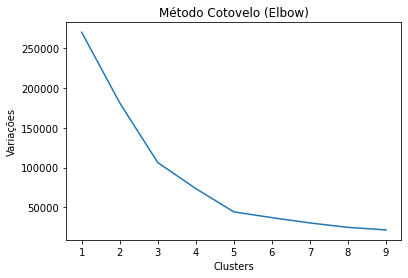

In [19]:
X = df.values
variacoes = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(X)
    variacoes.append(kmeans.inertia_)

plt.plot(range(1,10), variacoes)
plt.title('Método Cotovelo (Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Variações')

In [20]:
kmeans_final = KMeans(n_clusters=5)

In [21]:
kmeans_final.fit(X)

KMeans(n_clusters=5)

In [22]:
cluster_pred = kmeans_final.predict(X)

In [24]:
cluster_centro = kmeans_final.cluster_centers_

In [25]:
cluster_centro

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [26]:
X.shape

(200, 2)

In [27]:
X[cluster_pred==0, 0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

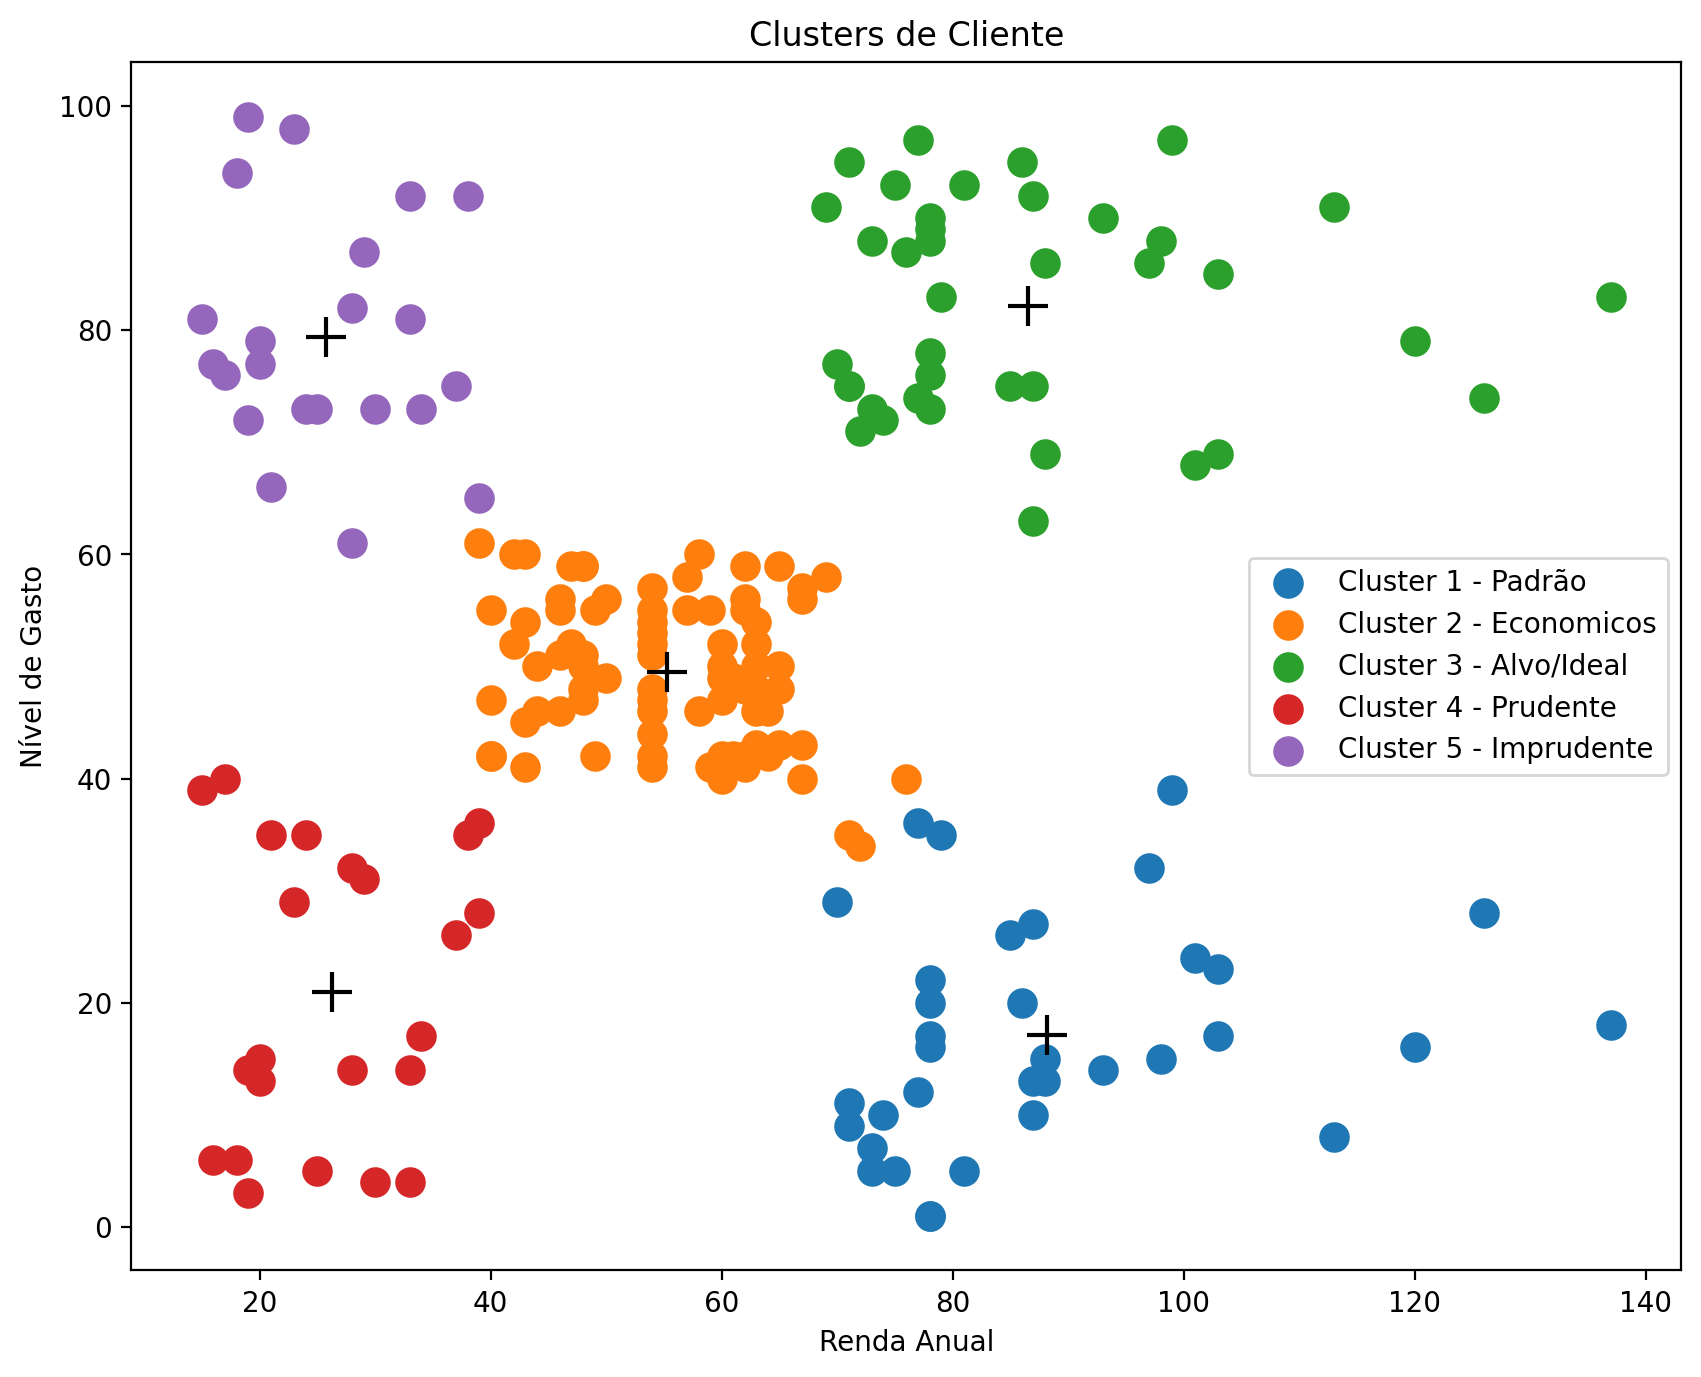

In [41]:
plt.figure(figsize=(10,8), dpi=200)

plt.scatter(X[cluster_pred==0, 0], X[cluster_pred==0, 1], s=100, label='Cluster 1 - Padrão')
plt.scatter(X[cluster_pred==1, 0], X[cluster_pred==1, 1], s=100, label='Cluster 2 - Economicos')
plt.scatter(X[cluster_pred==2, 0], X[cluster_pred==2, 1], s=100, label='Cluster 3 - Alvo/Ideal')
plt.scatter(X[cluster_pred==3, 0], X[cluster_pred==3, 1], s=100, label='Cluster 4 - Prudente')
plt.scatter(X[cluster_pred==4, 0], X[cluster_pred==4, 1], s=100, label='Cluster 5 - Imprudente')

plt.scatter(cluster_centro[:,0], cluster_centro[:,1], marker='+', s=200, c='black')

plt.title('Clusters de Cliente')
plt.xlabel('Renda Anual')
plt.ylabel('Nível de Gasto')

plt.legend()
plt.show()